### Tutorial 10: Calculating transport and radiation properties of an SiO-CO plasma

The most common use of minplascalc is expected to be the calculation of thermophysical properties of plasmas in LTE as a function of elemental composition, temperature, and pressure. For the more complex SiO-CO plasma, mixtures must be created as described in <a href="Tutorial 7 - SiCO Plasma LTE Composition.ipynb">Tutorial 7</a> to specify the plasma species present and the relative proportions of elements. 

For this tutorial we'll again look at three different SiO-CO mixtures ranging from 10% SiO to 90% SiO by mole to show how the properties are affected by different mixture ratios.

Start off by loading up the modules required.

In [1]:
%matplotlib inline
import numpy
from matplotlib import pyplot

import minplascalc as mpc

Next, we create some minplascalc LTE mixture objects as before.

In [2]:
species = [
    "O2",
    "O2+",
    "O",
    "O+",
    "O++",
    "CO",
    "CO+",
    "C",
    "C+",
    "C++",
    "SiO",
    "SiO+",
    "Si",
    "Si+",
    "Si++",
]
x0s = [[0, 0, 0, 0, 0, 1 - sio, 0, 0, 0, 0, sio, 0, 0, 0, 0] for sio in [0.1, 0.5, 0.9]]
sicomixes = [mpc.mixture.lte_from_names(species, x0, 1000, 101325) for x0 in x0s]

Next, set a range of temperatures to calculate the thermophysical properties at - in this case we're going from 1000 to 25000 K. Also initialise lists to store the property values at each temperature

In [3]:
temperatures = numpy.linspace(1000, 25000, 100)
viscosity = [[] for i in range(3)]
econd = [[] for i in range(3)]
tcond = [[] for i in range(3)]
emissioncoefft = [[] for i in range(3)]

Now we can perform the property calculations. We loop over all the temperatures setting the mixture object's temperature attribute to the appropriate value, and calculating the relevant properties by calling the LTE object's <span style="font-family: 'Courier';">calculate_viscosity()</span>, <span style="font-family: 'Courier';">calculate_electrical_conductivity()</span>, <span style="font-family: 'Courier';">calculate_thermal_conductivity()</span>, and <span style="font-family: 'Courier';">calculate_total_emission_coefficient()</span> functions. Internally, these make calls to  <span style="font-family: 'Courier';">calculate_composition()</span> to obtain the composition of the plasma before the calculation of the properties. 

Note that execution of these calculations is fairly compute intensive and as a result the following code snippet may take a few minutes or more to complete.

In [4]:
for i, sicomix in enumerate(sicomixes):
    for T in temperatures:
        sicomix.T = T
        viscosity[i].append(sicomix.calculate_viscosity())
        econd[i].append(sicomix.calculate_electrical_conductivity())
        emissioncoefft[i].append(sicomix.calculate_total_emission_coefficient())
        tcond[i].append(sicomix.calculate_thermal_conductivity())

Now we can visualise the properties by plotting them against temperature, to see how they vary.

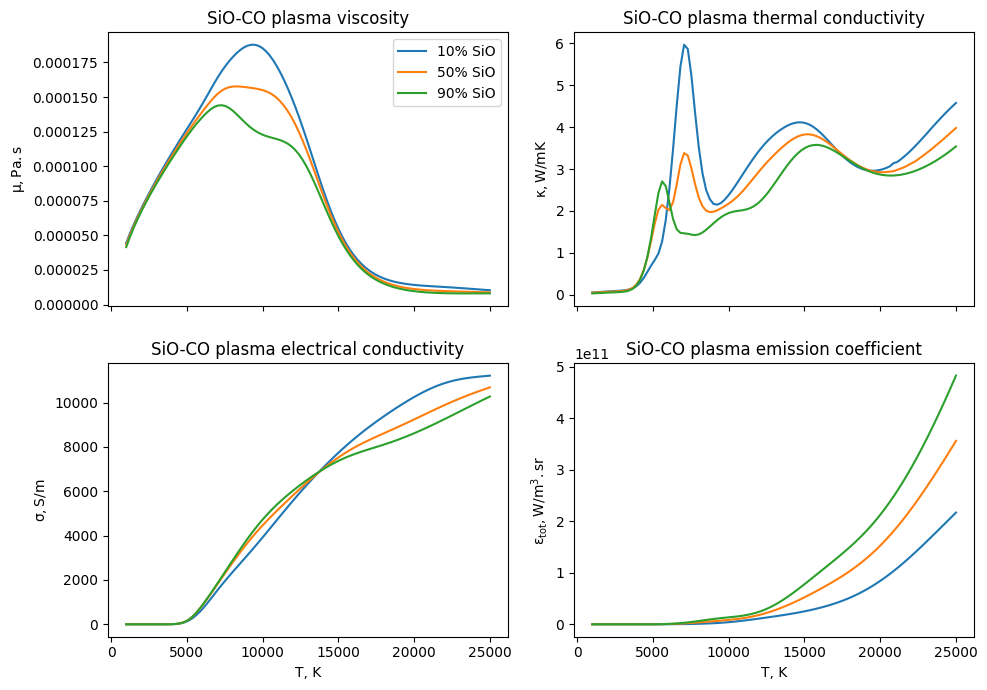

In [5]:
fig, axs = pyplot.subplots(2, 2, figsize=(10, 7), sharex=True)

labels = ["10% SiO", "50% SiO", "90% SiO"]

ax = axs[0, 0]
ax.set_title("SiO-CO plasma viscosity")
ax.set_ylabel("$\\mathregular{\\mu, Pa.s}$")
for visc, lbl in zip(viscosity, labels):
    ax.plot(temperatures, visc, label=lbl)
ax.legend()

ax = axs[0, 1]
ax.set_title("SiO-CO plasma thermal conductivity")
ax.set_ylabel("$\\mathregular{\\kappa, W/mK}$")
for tk, lbl in zip(tcond, labels):
    ax.plot(temperatures, tk, label=lbl)

ax = axs[1, 0]
ax.set_title("SiO-CO plasma electrical conductivity")
ax.set_xlabel("T, K")
ax.set_ylabel("$\\mathregular{\\sigma, S/m}$")
for ek, lbl in zip(econd, labels):
    ax.plot(temperatures, ek, label=lbl)

ax = axs[1, 1]
ax.set_title("SiO-CO plasma emission coefficient")
ax.set_xlabel("T, K")
ax.set_ylabel("$\\mathregular{\\epsilon_{tot}, W/m^3.sr}$")
for etot, lbl in zip(emissioncoefft, labels):
    ax.plot(temperatures, etot, label=lbl)

pyplot.tight_layout()

The impact of changing the elemental composition of the plasma is again quite considerable and non-linear, especially for thermal conductivity and emission coefficient. The general trend as SiO content in the plasma increases is toward slightly lower values of $\mu$ and $\kappa$, and much higher values of $\epsilon_{tot}$, with $\sigma$ varying relatively little except at high temperatures.